# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from citipy import citipy
from api_keys import weather_api_key
from scipy.stats import linregress
import scipy.stats as st


In [2]:
api_key = weather_api_key
city_name = "London"
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={api_key}&units=Imperial"



In [3]:
requests.get(url+"&q="+city_name).json()

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 69.93,
  'feels_like': 69.49,
  'temp_min': 65.1,
  'temp_max': 73.15,
  'pressure': 1018,
  'humidity': 61},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 250},
 'clouds': {'all': 100},
 'dt': 1628967508,
 'sys': {'type': 2,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1628916280,
  'sunset': 1628969153},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

## Generate Cities List

In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

print(cities)




605
['berlevag', 'butaritari', 'airai', 'bambous virieux', 'mount gambier', 'san patricio', 'rikitea', 'pevek', 'cape town', 'chuy', 'illoqqortoormiut', 'shingu', 'mataura', 'touros', 'albany', 'pangnirtung', 'attawapiskat', 'east london', 'nuevitas', 'gravdal', 'longyearbyen', 'luderitz', 'kargopol', 'punta arenas', 'tumannyy', 'tiksi', 'grand centre', 'dikson', 'bredasdorp', 'port elizabeth', 'vostok', 'hami', 'busselton', 'red bluff', 'hasaki', 'amderma', 'safonovo', 'belaya gora', 'barrow', 'cozumel', 'ushuaia', 'bluff', 'castro', 'kavieng', 'puerto ayora', 'sao filipe', 'trapani', 'geraldton', 'salalah', 'pregassona', 'dolores', 'svetlogorsk', 'taolanaro', 'hobart', 'jamestown', 'victoria', 'gat', 'katsuura', 'yar-sale', 'sukhodol', 'hermanus', 'coruripe', 'long beach', 'poum', 'qaanaaq', 'belushya guba', 'maniitsoq', 'new norfolk', 'chokurdakh', 'rach gia', 'bilibino', 'vaini', 'militello in val di catania', 'quang ngai', 'basco', 'mar del plata', 'port alfred', 'tsihombe', 'aksa

In [5]:
requests.get(url).json()

{'cod': '400', 'message': 'Nothing to geocode'}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
#count_one = 0
#set_one = 1

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()    
    
    
    
    try:
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|berlevag
Processing record 2|butaritari
Processing record 3|airai
Processing record 4|bambous virieux
Processing record 5|mount gambier
Processing record 6|san patricio
Processing record 7|rikitea
Processing record 8|pevek
Processing record 9|cape town
Processing record 10|chuy
City not found. skipping.
Processing record 11|shingu
Processing record 12|mataura
Processing record 13|touros
Processing record 14|albany
Processing record 15|pangnirtung
City not found. skipping.
Processing record 16|east london
Processing record 17|nuevitas
Processing record 18|gravdal
Processing record 19|longyearbyen
Processing record 20|luderitz
Processing record 21|kargopol
Processing record 22|punta arenas
City not found. skipping.
Processing record 23|tiksi
City not found. skipping.
Processing record 24|dikson
Processing record 25|bredasdorp
Processing record 26|port elizabeth
Processing record 27|vostok
Processing record 28|hami
Processing record 29|busselton
Processing record 30|re

Processing record 246|isangel
Processing record 247|zupanja
Processing record 248|lynn haven
Processing record 249|viedma
City not found. skipping.
Processing record 250|kocevje
City not found. skipping.
Processing record 251|ogulin
City not found. skipping.
Processing record 252|bonthe
Processing record 253|coquimbo
Processing record 254|makakilo city
Processing record 255|mao
Processing record 256|stornoway
Processing record 257|bilma
Processing record 258|dafeng
Processing record 259|lidkoping
Processing record 260|ponta do sol
City not found. skipping.
Processing record 261|ostrovnoy
Processing record 262|bairiki
City not found. skipping.
Processing record 263|mahanje
Processing record 264|hofn
Processing record 265|nioro
Processing record 266|pontianak
Processing record 267|husavik
Processing record 268|nuevo progreso
Processing record 269|cherskiy
Processing record 270|plettenberg bay
Processing record 271|huarmey
Processing record 272|ponta delgada
Processing record 273|mandalgo

Processing record 497|jiaocheng
Processing record 498|malanje
Processing record 499|samana
Processing record 500|angoche
Processing record 501|noyabrsk
Processing record 502|betong
City not found. skipping.
Processing record 503|port lincoln
Processing record 504|piacabucu
Processing record 505|ust-ishim
Processing record 506|avera
Processing record 507|corrente
Processing record 508|antalaha
Processing record 509|darhan
Processing record 510|bereda
Processing record 511|ridgecrest
Processing record 512|wangqing
Processing record 513|redmond
City not found. skipping.
Processing record 514|neuquen
Processing record 515|asau
Processing record 516|sibiti
Processing record 517|hokitika
Processing record 518|cochabamba
Processing record 519|moree
Processing record 520|new glasgow
City not found. skipping.
City not found. skipping.
Processing record 521|flinders
Processing record 522|mainburg
City not found. skipping.
City not found. skipping.
Processing record 523|shipley
Processing record 

In [7]:
#city_df = pd.DataFrame(city_info,columns = columns)
#city_df

city_df = pd.DataFrame({"City Name":city_name, 
                        "Cloudiness":cloudinesses, 
                        "Country":countries, 
                        "Date":dates, 
                        "Humidity":humidities,
                        "Latitude":lats,
                        "Longitude":lngs,
                        "Max Temp":max_temps,
                        "Wind Speed":wind_speeds
                                         })
city_df.head(10)

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,London,20,NO,1628967551,86,70.8578,29.0864,48.58,9.55
1,London,100,KI,1628967551,77,3.0707,172.7902,81.16,8.05
2,London,4,TL,1628967552,77,-8.9266,125.4092,54.21,3.40
3,London,75,MU,1628967312,78,-20.3428,57.7575,71.85,14.97
4,London,90,AU,1628967552,93,-37.8333,140.7667,48.11,12.66
5,London,89,US,1628967553,46,28.0170,-97.5169,95.09,9.78
6,London,26,PF,1628967553,82,-23.1203,-134.9692,74.41,18.21
7,London,100,RU,1628967046,97,69.7008,170.3133,35.67,16.98
8,London,0,ZA,1628967437,68,-33.9258,18.4232,56.12,1.01
9,London,99,UY,1628967554,90,-33.6971,-53.4616,57.72,6.76


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df.to_csv(index=False)
# Output File (CSV)
output_data_file = "weather_city_file.csv"
city_df.to_csv(output_data_file)



In [9]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City Name   558 non-null    object 
 1   Cloudiness  558 non-null    int64  
 2   Country     558 non-null    object 
 3   Date        558 non-null    int64  
 4   Humidity    558 non-null    int64  
 5   Latitude    558 non-null    float64
 6   Longitude   558 non-null    float64
 7   Max Temp    558 non-null    float64
 8   Wind Speed  558 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.4+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
##new_city_df[new_city_df['humidity'] > 100 ]
city_df.sort_values(by='Humidity', ascending=False)



,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
79,London,0,RU,1628967574,100,53.6039,91.3903,55.29,4.47
50,London,0,IL,1628967565,100,31.6100,34.7642,83.08,7.29
265,London,90,ID,1628967646,100,-0.0333,109.3333,75.18,1.14
198,London,100,RU,1628967617,99,58.3814,97.4531,59.88,3.13
133,London,100,CO,1628967590,99,1.1983,-70.1733,71.56,0.98
...,...,...,...,...,...,...,...,...,...
152,London,100,SA,1628967455,11,24.6877,46.7219,100.54,7.96
329,London,5,PK,1628967673,11,28.5833,65.4167,89.80,2.66
140,London,41,AR,1628967591,10,-34.6177,-68.3301,70.09,10.49
478,London,7,US,1628967546,10,43.1330,-115.6912,97.25,16.64


In [11]:
clean_city_df = city_df[city_df['Humidity'] <= 99]
clean_city_df



,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,London,20,NO,1628967551,86,70.8578,29.0864,48.58,9.55
1,London,100,KI,1628967551,77,3.0707,172.7902,81.16,8.05
2,London,4,TL,1628967552,77,-8.9266,125.4092,54.21,3.40
3,London,75,MU,1628967312,78,-20.3428,57.7575,71.85,14.97
4,London,90,AU,1628967552,93,-37.8333,140.7667,48.11,12.66
...,...,...,...,...,...,...,...,...,...
553,London,99,NO,1628967747,86,61.9353,5.1136,59.05,1.79
554,London,100,IN,1628967747,86,8.8833,76.6000,78.67,11.34
555,London,97,MG,1628967748,77,-17.5833,48.2167,62.85,9.42
556,London,4,IN,1628967748,67,22.5500,71.4667,81.16,17.74


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

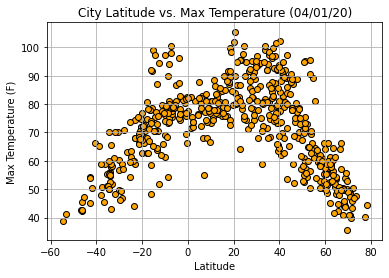

<Figure size 432x288 with 0 Axes>

In [20]:

#Creating plot
plt.scatter(clean_city_df["Latitude"], clean_city_df["Max Temp"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature (04/01/20)")
plt.show()
plt.savefig("City_Latitude_vs_Max_Temperature.png")

## Latitude vs. Humidity Plot

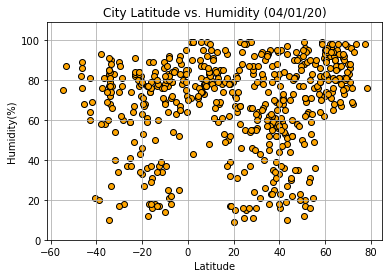

<Figure size 432x288 with 0 Axes>

In [21]:
plt.scatter(clean_city_df["Latitude"], clean_city_df["Humidity"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.ylim(0, clean_city_df["Humidity"].max()+10)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity (04/01/20)")
plt.show()
plt.savefig("City_Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

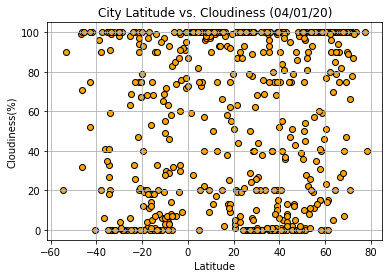

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(clean_city_df["Latitude"],clean_city_df["Cloudiness"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness (04/01/20)")
plt.show()
plt.savefig("City_Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

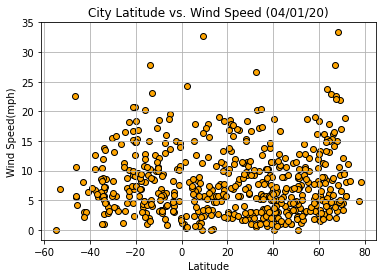

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(clean_city_df["Latitude"], clean_city_df["Wind Speed"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed (04/01/20)")
plt.show()
plt.savefig("City_Latitude_vs_Wind_Speed_.png")

## Linear Regression

In [24]:
N_Hemisphere = clean_city_df.loc[clean_city_df["Latitude"] >= 0]
S_Hemisphere = clean_city_df.loc[clean_city_df["Latitude"] < 0]

In [25]:
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.66


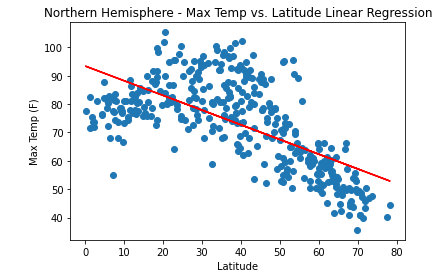

In [26]:
equation = linear_regression(N_Hemisphere["Latitude"], N_Hemisphere["Max Temp"])

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

annotate(equation, -20, 30)

plt.savefig("Northern_Hemisphere_Max Temp_vs_Latitude_Linear_Regression.png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.77


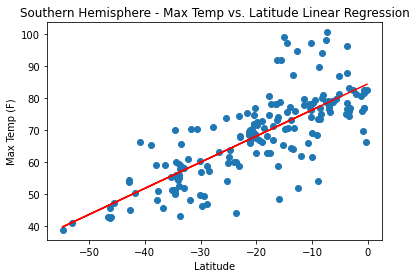

In [27]:
equation = linear_regression(S_Hemisphere["Latitude"],S_Hemisphere["Max Temp"])

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

annotate(equation, -20, 30)

plt.savefig("Southern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.14


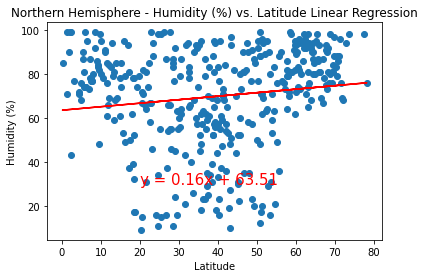

In [28]:
equation = linear_regression(N_Hemisphere["Latitude"], N_Hemisphere["Humidity"])

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

annotate(equation, 20, 30)

plt.savefig("Northern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.03


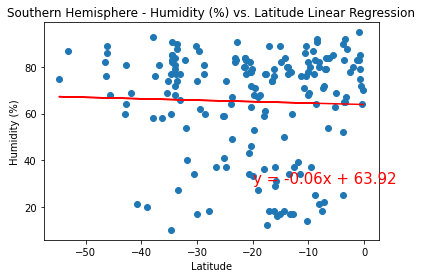

In [29]:
equation = linear_regression(S_Hemisphere["Latitude"], S_Hemisphere["Humidity"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

annotate(equation, -20, 30)

plt.savefig("Southern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.05


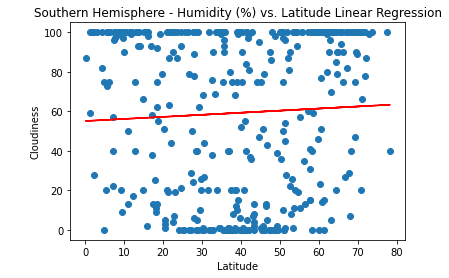

In [30]:
equation = linear_regression(N_Hemisphere["Latitude"], N_Hemisphere["Cloudiness"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

annotate(equation, -20, 30)

plt.savefig("Northern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.02


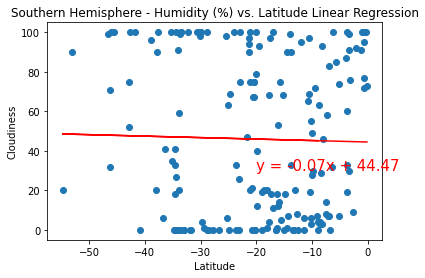

In [31]:
equation = linear_regression(S_Hemisphere["Latitude"], S_Hemisphere["Cloudiness"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

annotate(equation, -20, 30)

plt.savefig("Southern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.08


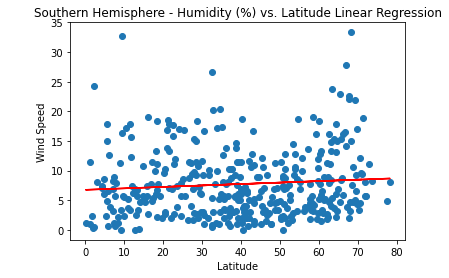

In [32]:
equation = linear_regression(N_Hemisphere["Latitude"], N_Hemisphere["Wind Speed"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

annotate(equation, -20, 30)

plt.savefig("Northern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.09


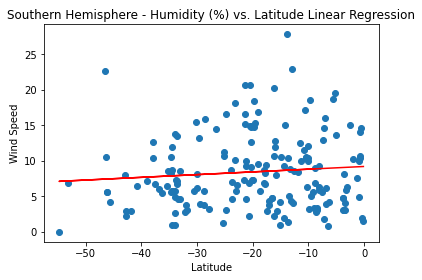

In [33]:
equation = linear_regression(S_Hemisphere["Latitude"], S_Hemisphere["Wind Speed"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

annotate(equation, -20, 30)

plt.savefig("Southern_Hemisphere_Wind Speed_vs_Latitude_Linear_Regression.png")